### Student Performance Indicator


- Life Cycle of Machine learning Project
  - Understanding the problem Statement
  - Data Collection 
  - Exploratory DATA analysis
  - data pre-Processing
  - Model Trainig 
  - Choose Best Model




1) problem statement 
    * this project understand how the students(test scores) is affected by other variables such as gender,Ethnicity,parental level of eduction,lunch,and test preparation course
    

2.1 Import Data and Required Packages
Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ans
import warnings
warnings.filterwarnings("ignore")


In [3]:
df=pd.read_csv("data/Std.csv")

In [4]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [6]:
df.isna().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [ ]:
#check describe
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [10]:
#check duplicats
df.duplicated().sum()

0

In [12]:
#check null & datatpes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [ ]:
#checking the number of uniques of each columns
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [ ]:
#check each feature unique data
print(df['gender'].unique())
print(df['lunch'].unique())
print(df['race/ethnicity'].unique())
print(df['parental level of education'].unique())
print(df['test preparation course'].unique())

['female' 'male']
['standard' 'free/reduced']
['group B' 'group C' 'group A' 'group D' 'group E']
["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
['none' 'completed']


In [26]:
#different types 

numeric_features= [feature for feature in df.columns if df[feature].dtype !="object"]
categorical_features= [feature for feature in df.columns if df[feature].dtype =="object"]

print("numeric_features:",numeric_features)
print("categorical_features:",categorical_features)

numeric_features: ['math score', 'reading score', 'writing score']
categorical_features: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [27]:
df["total_score"]=df["math score"]+df['reading score']+df['writing score']
df['average_score']=df['total_score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


In [30]:
#check the full marks stud

math=df[df['math score']==100]['average_score'].count()
test=df[df['reading score']==100]['average_score'].count()
writting=df[df['writing score']==100]['average_score'].count()


print("math top studs:",math)
print("reading top studs:",test)
print("writting top studs:",writting)






math top studs: 7
reading top studs: 17
writting top studs: 14


In [33]:
math=df[df['math score']<=20]['average_score'].count()
test=df[df['reading score']<=20]['average_score'].count()
writting=df[df['writing score']<=20]['average_score'].count()


print("math less then studs:",math)
print("reading less then studs:",test)
print("writting less then studs:",writting)

math less then studs: 4
reading less then studs: 1
writting less then studs: 3


In [34]:
import seaborn as sns

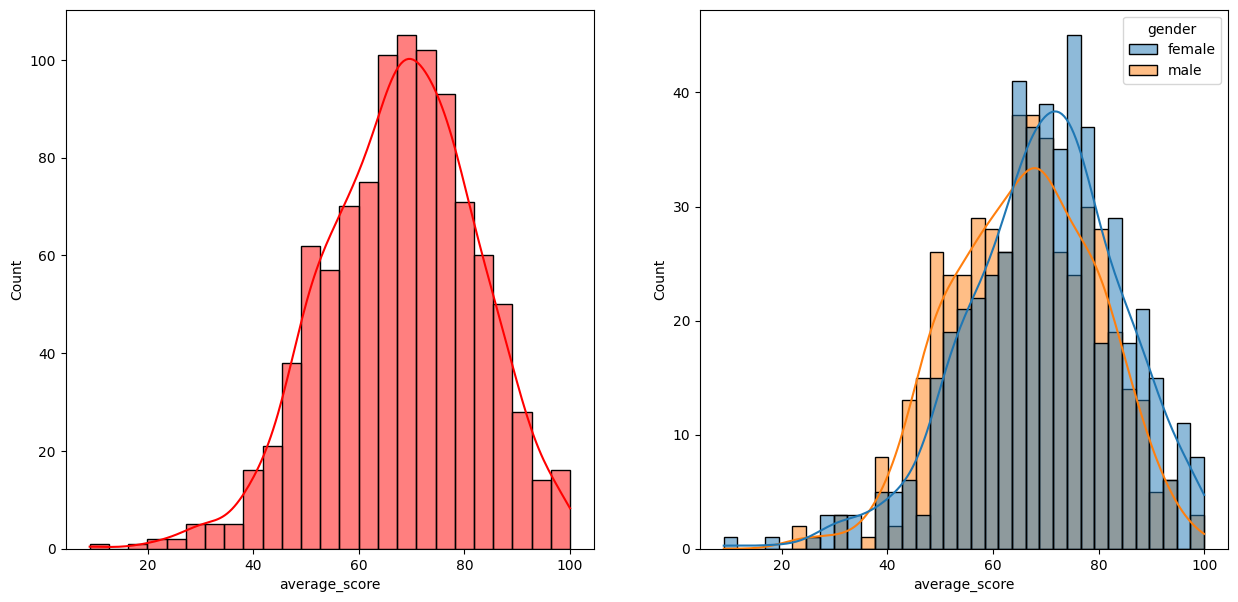

In [36]:
#histogram & kde

fig,axs = plt.subplots(1,2 ,figsize=(15,7))
plt.subplot(121)
sns.histplot(x="average_score",data=df,bins=25,kde=True,color="r")
plt.subplot(122)
sns.histplot(x="average_score",data=df,bins=35,kde=True,hue='gender')
plt.show()

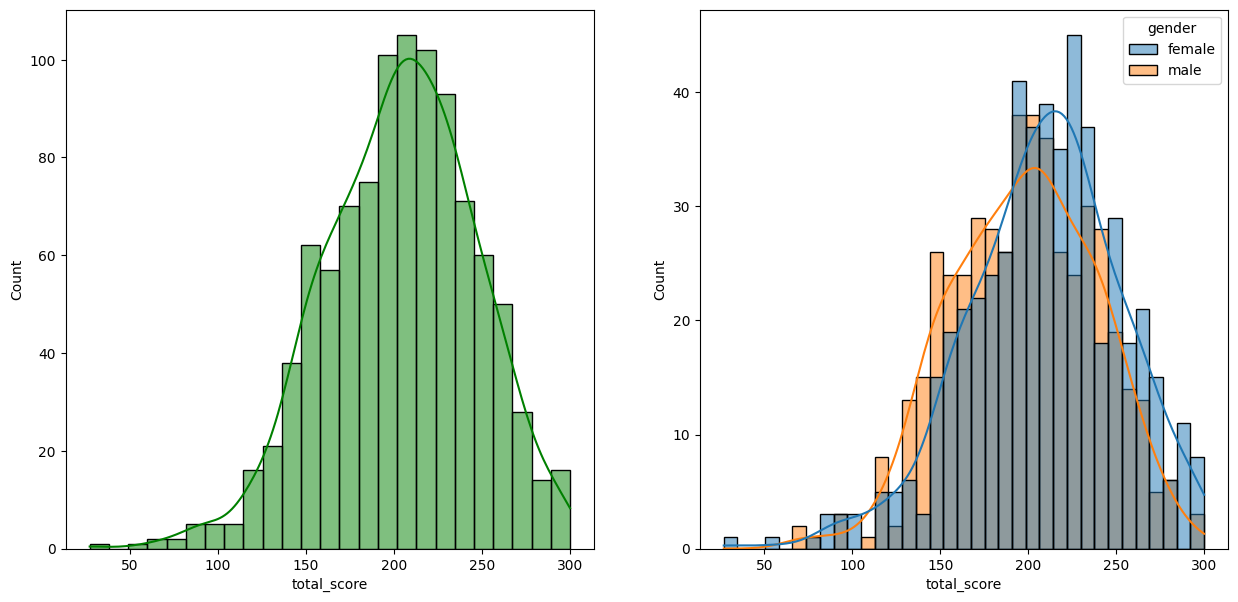

In [38]:
fig,axs = plt.subplots(1,2 ,figsize=(15,7))
plt.subplot(121)
sns.histplot(x='total_score',data=df,bins=25,kde=True,color="g")
plt.subplot(122)
sns.histplot(x="total_score",data=df,bins=35,kde=True,hue='gender')
plt.show()

In [39]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


<Axes: xlabel='gender'>

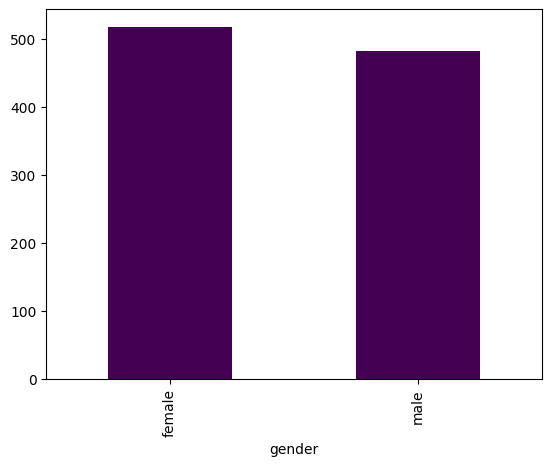

In [43]:
df['gender'].value_counts().plot(kind="bar", colormap="viridis")


<Axes: xlabel='race/ethnicity'>

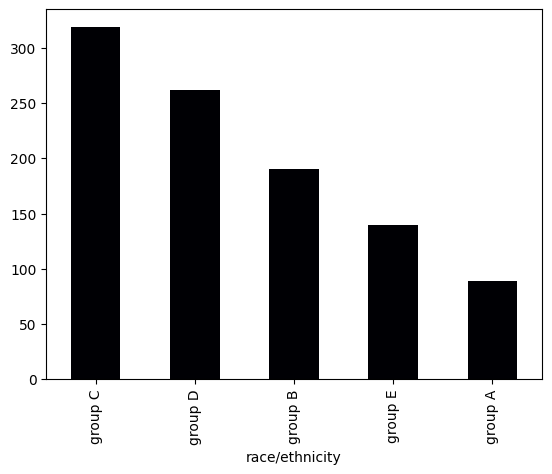

In [49]:
df['race/ethnicity'].value_counts().plot(kind="bar",colormap="inferno")

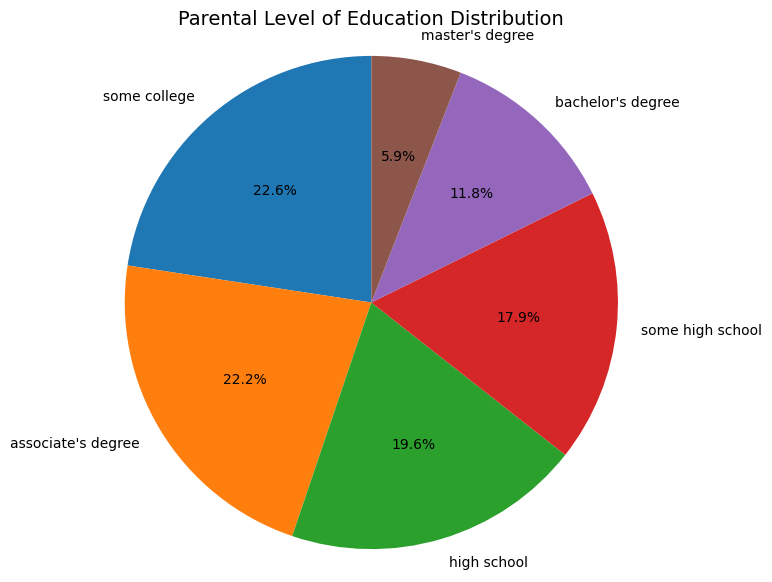

In [56]:
count = df["parental level of education"].value_counts()

plt.figure(figsize=(7,7))
plt.pie(
    count,
    labels=count.index,
    autopct="%1.1f%%",
    startangle=90,

)
plt.title("Parental Level of Education Distribution", fontsize=14)
plt.axis("equal")   # makes circle perfect
plt.show()



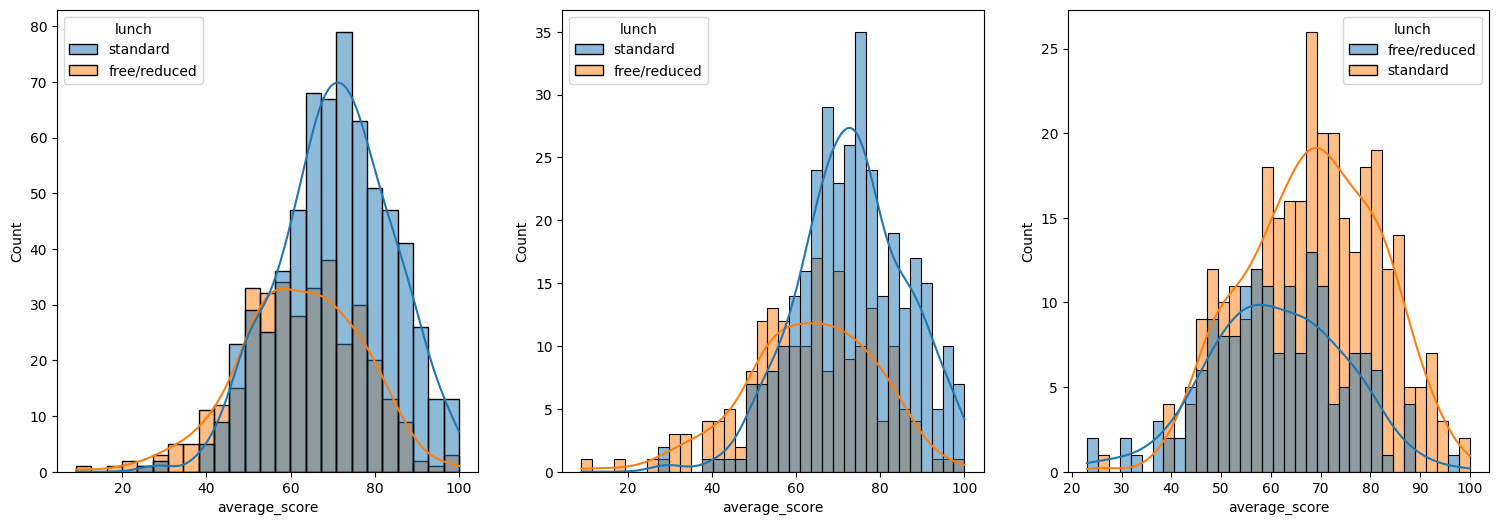

In [72]:
#female students tend to perform well then male student

fig,axs = plt.subplots(1,3 ,figsize=(25,6))
plt.subplot(141)
sns.histplot(x="average_score",data=df,bins=25,kde=True,color="r",hue='lunch')
plt.subplot(142)
sns.histplot(data=df[df.gender=="female"],x="average_score",bins=35,kde=True,hue='lunch')
plt.subplot(143)
sns.histplot(data=df[df.gender=="male"],x="average_score",bins=35,kde=True,hue='lunch')
plt.show()

In [73]:
df.head(2)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,total_score,average_score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333


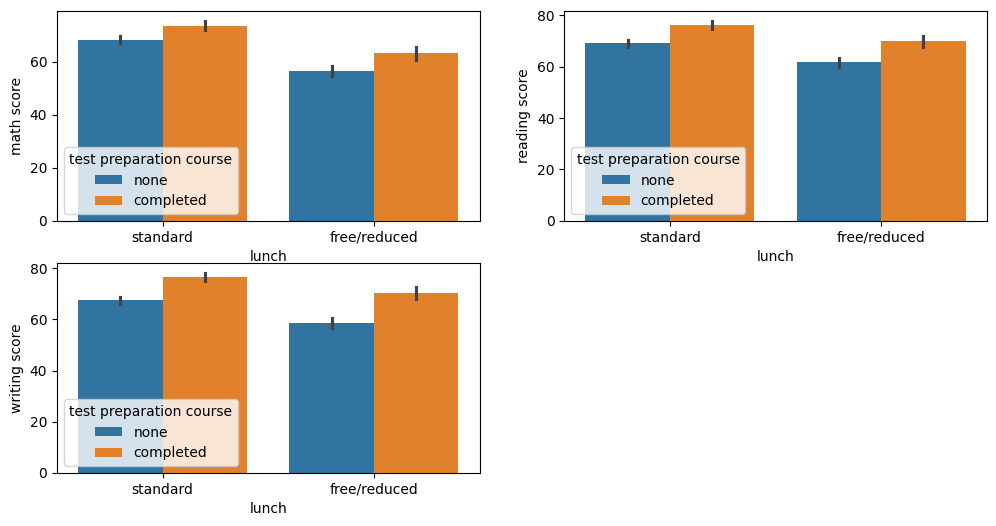

In [76]:
plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.barplot(x=df['lunch'],y=df['math score'],hue=df['test preparation course'])
plt.subplot(2,2,2)
sns.barplot(x=df['lunch'],y=df['reading score'],hue=df['test preparation course'])
plt.subplot(2,2,3)
sns.barplot(x=df['lunch'],y=df['writing score'],hue=df['test preparation course'])
plt.show()